# **Analyzing User Purchase Behavior Dataset**

From this dataset, what are we able to infer from users purchase behaviors around the world? Do purchase behaviors differ between demographics? Are there seasonal trends in purchase behavior across different countries and product categories? 

## Goal

By performing a data analysis with Python, I aim to gain insights into customer purchasing behaviors across various demographic segments and geographics regions. By examining factors like age, gender, product category, and purchase amount, I aim to identify trends that can be used to create data-driven decisions for marketing strategies. This analysis can also help reveal seasonal trends or patterns yearly that can help plan inventory and advertisements. 

## Setup
First, I need to import the necessary libraries I'll use for this project and also read in the dataset from the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from scipy import stats 

# Read in data
df = pd.read_csv('dataset.csv')

# Looking at the first 5 rows of the data
df.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


## Data Cleaning

In [2]:
# Check for missing values
df.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

In [3]:
# Remove rows with missing values
df = df.dropna()

In [4]:
# Checking if the rows with missing values have been removed
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category


In [5]:
# Checking the data types of the columns
print(df.dtypes)

User ID               int64
Age                 float64
Gender               object
Country              object
Purchase Amount     float64
Purchase Date        object
Product Category     object
dtype: object


In [6]:
# Adjusting the age data types to int64 to remove fractional ages
df['Age'] = df['Age'].astype('int64')
df

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56,Female,USA,331.79,2021-11-21,Sports
1,2,69,Male,Australia,335.72,2022-03-05,Home & Kitchen
3,4,32,Male,Germany,80.97,2023-06-08,Sports
6,7,38,Female,Canada,222.20,2022-02-23,Beauty
7,8,56,Male,USA,217.27,2021-09-08,Sports
...,...,...,...,...,...,...,...
14993,14994,54,Male,Australia,200.24,2021-11-26,Clothing
14995,14996,21,Male,UK,427.07,2023-08-20,Clothing
14996,14997,53,Other,UK,27.73,2021-07-23,Home & Kitchen
14997,14998,65,Female,Canada,108.57,2022-02-21,Beauty


In [7]:
# Adding a "Month" and "Year" column to the dataframe for better augmentation
# Put "Purchase Data" into a datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Add "Month" and "Year" columns
df['Month'] = df['Purchase Date'].dt.month_name()
df['Year'] = df['Purchase Date'].dt.year 
df

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category,Month,Year
0,1,56,Female,USA,331.79,2021-11-21,Sports,November,2021
1,2,69,Male,Australia,335.72,2022-03-05,Home & Kitchen,March,2022
3,4,32,Male,Germany,80.97,2023-06-08,Sports,June,2023
6,7,38,Female,Canada,222.20,2022-02-23,Beauty,February,2022
7,8,56,Male,USA,217.27,2021-09-08,Sports,September,2021
...,...,...,...,...,...,...,...,...,...
14993,14994,54,Male,Australia,200.24,2021-11-26,Clothing,November,2021
14995,14996,21,Male,UK,427.07,2023-08-20,Clothing,August,2023
14996,14997,53,Other,UK,27.73,2021-07-23,Home & Kitchen,July,2021
14997,14998,65,Female,Canada,108.57,2022-02-21,Beauty,February,2022


## Data Analysis
Now that the data has been cleaned, I want to explore trends and distribution of various factors in the dataset.

### What is the gender distribution in this dataset?

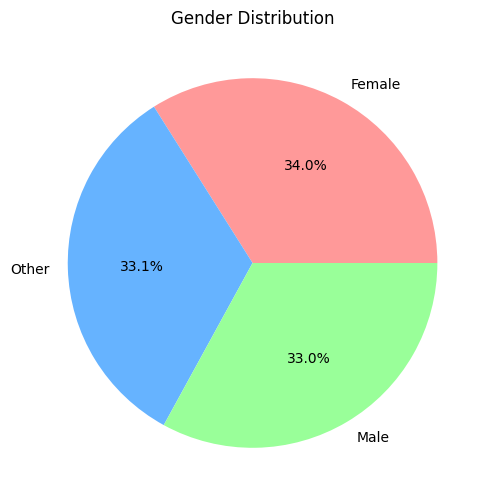

In [8]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plot the gender distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Gender Distribution')
plt.show()

This pi-graph shows that there generally is a balanced gender representation within this data set. This suggests that purchasing behavior is not skewed towards a specific gender, and needs further analysis to find diffrences.

### Total Purchase Amount by Gender

/var/folders/bp/qs71ygfd61n4f2w3xl11qdqr0000gn/T/ipykernel_4809/485783126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase Amount', data=total_purchase_by_gender, palette='pastel')


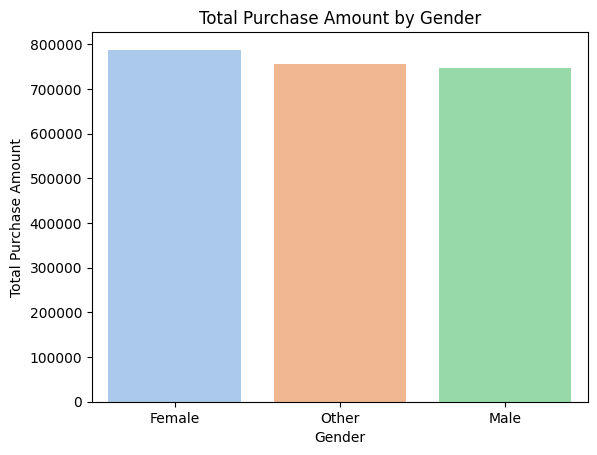

In [9]:
# Calculate total purchase amount by gender
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount'].sum().reset_index()

# Sort the data to view in descending order
total_purchase_by_gender = total_purchase_by_gender.sort_values(by='Purchase Amount', ascending=False)

# Plot the total purchase amount by gender
sns.barplot(x='Gender', y='Purchase Amount', data=total_purchase_by_gender, palette='pastel')
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

This graph compares the total purchase amounts by gender, showing that females have the highesst spending level. There is only a slight difference in purchase amounts across the genders, suggesting that not one gender should be targetted for marketing.

### What is the age distribution?

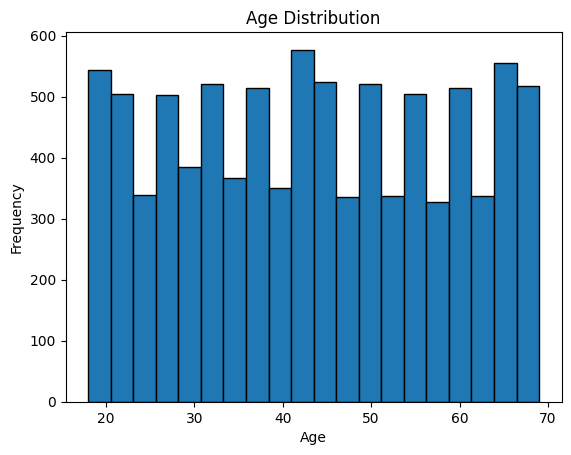

In [10]:
plt.hist(df['Age'], bins=20, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

This histogram shows that there is a balanced distribution of ages of the ages from 20-70 years old. They each have a similar frequency, with a slight peak in the 40s. 

### How does the spending behavior of different countries compare?

/var/folders/bp/qs71ygfd61n4f2w3xl11qdqr0000gn/T/ipykernel_4809/2065838793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Purchase Amount', data=country_total_purchase, palette='Blues_d')


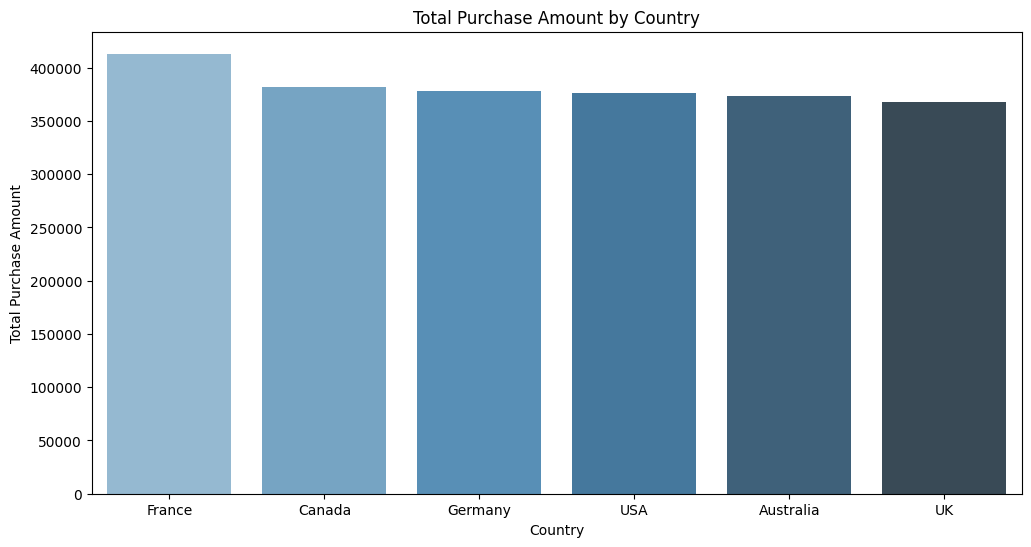

In [11]:
# Calculate total purchase amount per country
country_total_purchase = df.groupby('Country')['Purchase Amount'].sum().reset_index()

# Sort the data to view in descending order
country_total_purchase = country_total_purchase.sort_values('Purchase Amount', ascending=False)

# Visualize the total purchase amount per country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Purchase Amount', data=country_total_purchase, palette='Blues_d')
plt.title('Total Purchase Amount by Country')
plt.xlabel('Country')
plt.ylabel('Total Purchase Amount')
plt.show()

Based on this bar plot, we can observe that there is fairly uniform spending across countries, with only slight variations and France leading up front. This suggests that the global customer base has relatively balanced spending per country, inferring that there is no need to tailor marketing for specific regions since spending behavior across them is relatively consistent. To find clearer distinctions, we need to explore the data further.

### Are different purchase categories more popular in different countries?

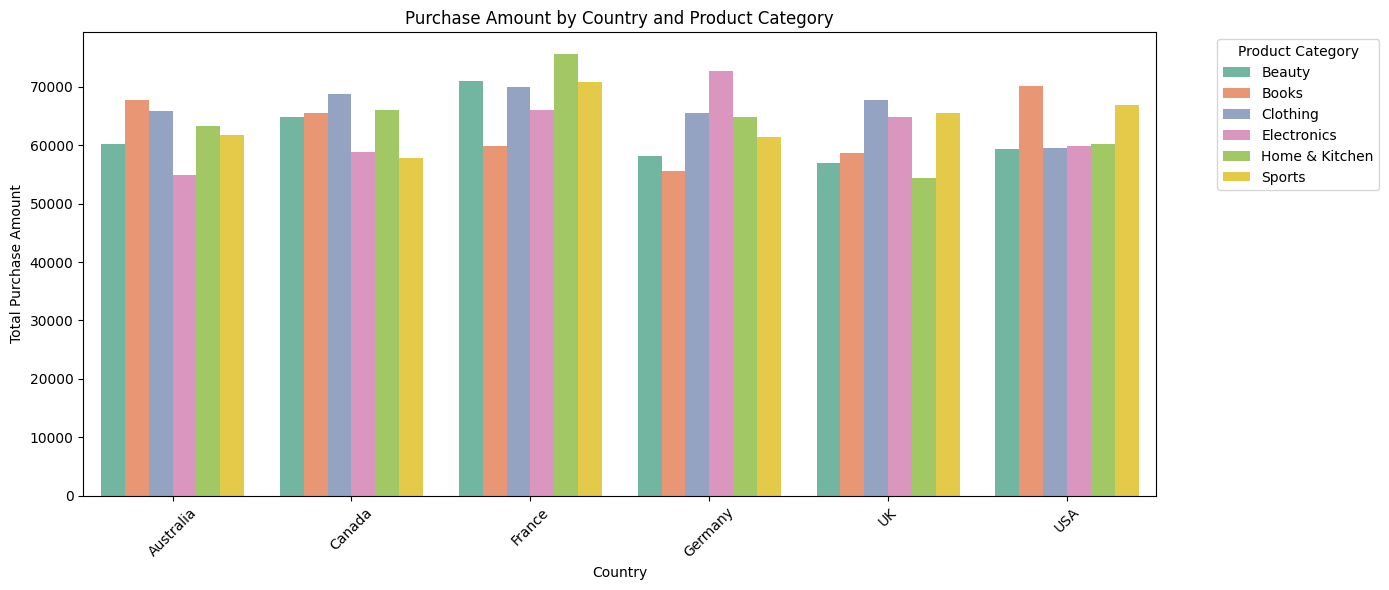

In [12]:
# Create a grouped dataset
category_country = df.groupby(['Country', 'Product Category'])['Purchase Amount'].sum().reset_index()

# Create a clustered bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Purchase Amount', hue='Product Category', data=category_country, palette='Set2')
plt.title('Purchase Amount by Country and Product Category')
plt.xlabel('Country')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From this clustered bar plot, we can see the differences in purchase behavior based on product category per country. From this, we can see how different products seem to be more dominant per country. For example, electronics in Germany and home and kitchen goods in France. By being able to see this distribution, businesses can aim to boost or promote more of the specific product that country prefers there, or the less popular products to try and stimulate market growth.  

### What months are the most purchases made?

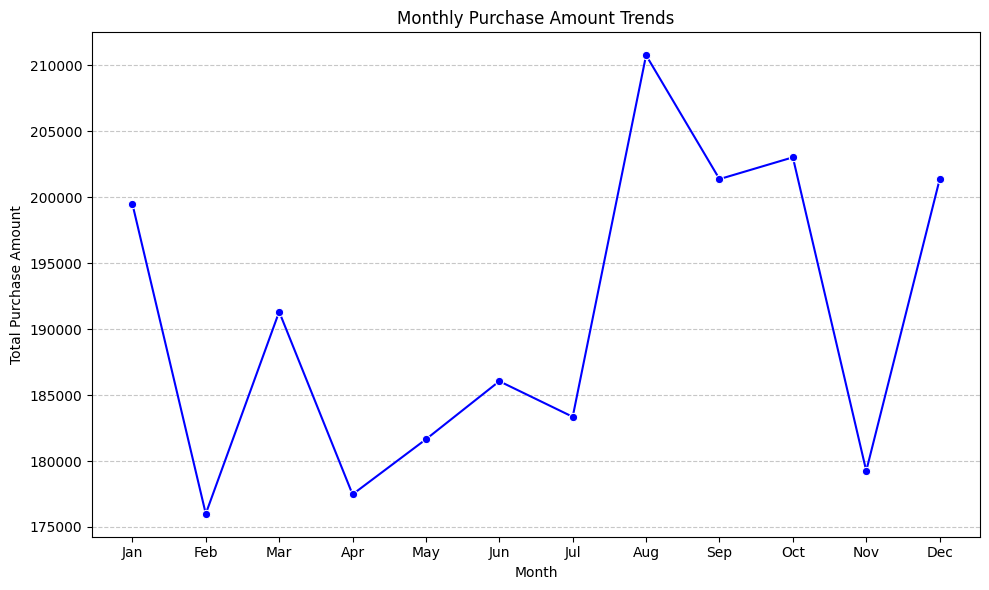

In [13]:
# Extract the month from the purchase date
df['Month'] = df['Purchase Date'].dt.month

# Group by month and calculate total purchase amount
monthly_trends = df.groupby('Month')['Purchase Amount'].sum().reset_index()

# Plot the monthly trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Purchase Amount', data=monthly_trends, marker='o', color='b')
plt.title('Monthly Purchase Amount Trends')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Here we can see seasonal trends for when purchases are made the most. With this, companies can strategize when to promote or advertise to take advantage of seasons where more people are looking to purchase items in the market.

### Conclusion:
With my analysis, I found global purchase behavior trends and how being a part of a different demographic might affect that behavior. For example, one Country may have more purchases in one category in another, or how different genders might have different purchase behavior. I was able to find valuable insights here that companies could use to make data-driven decisions, with visualizations to make the information easy to understand.